In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('Cancer_data.csv')

In [3]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\panir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


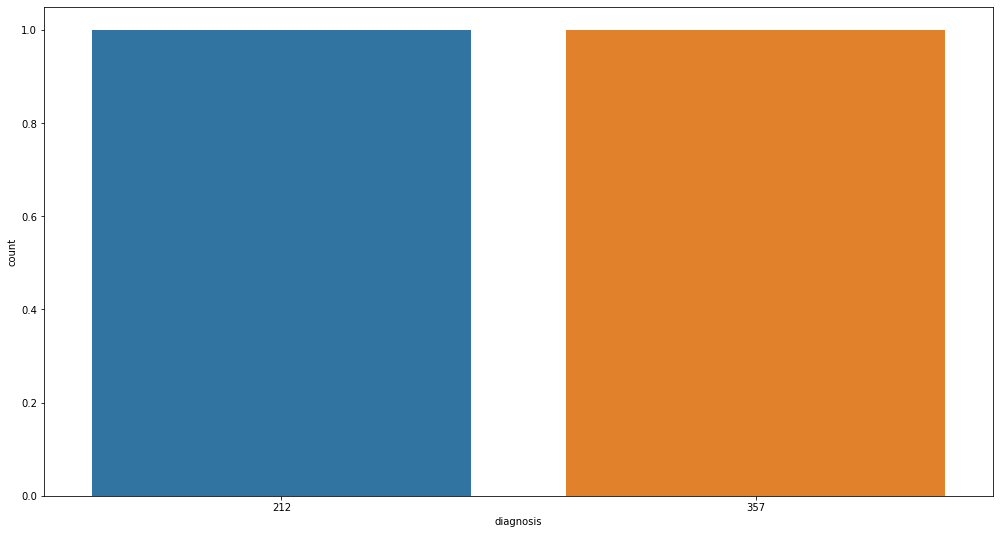

In [4]:
plt.figure(figsize=[17,9])
sb.countplot(df['diagnosis'].value_counts())
plt.show()

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#droping feature
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [7]:
# independent variables
x = df.drop('diagnosis',axis=1)
#dependent variables
y = df.diagnosis

In [8]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
y = lb.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=40)

In [10]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler
#creating object
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [11]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [12]:
#creating model
classifier = Sequential()

#first hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))
#second hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [13]:
#taking summary of layers
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 279       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [14]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
#fitting the ANN to the training set
model = classifier.fit(xtrain,ytrain,batch_size=100,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5111 - accuracy: 0.6457
Epoch 2/100
4/4 [==============================] - 0s 0s/step - loss: 0.4912 - accuracy: 0.6633
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.6935
Epoch 4/100
4/4 [==============================] - 0s 0s/step - loss: 0.4599 - accuracy: 0.7136
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.7437
Epoch 6/100
4/4 [==============================] - 0s 0s/step - loss: 0.4341 - accuracy: 0.7638
Epoch 7/100
4/4 [==============================] - 0s 0s/step - loss: 0.4214 - accuracy: 0.7814
Epoch 8/100
4/4 [==============================] - 0s 0s/step - loss: 0.4089 - accuracy: 0.7940
Epoch 9/100
4/4 [==============================] - 0s 0s/step - loss: 0.3957 - accuracy: 0.8040
Epoch 10/100
4/4 [==============================] - 0s 0s/step - loss: 0.3823 - accuracy: 0.8166
Epoch 11/100
4/4 [==================

Epoch 85/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9824
Epoch 86/100
4/4 [==============================] - 0s 0s/step - loss: 0.0619 - accuracy: 0.9824
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9824
Epoch 88/100
4/4 [==============================] - 0s 0s/step - loss: 0.0604 - accuracy: 0.9824
Epoch 89/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0597 - accuracy: 0.9824
Epoch 90/100
4/4 [==============================] - 0s 0s/step - loss: 0.0590 - accuracy: 0.9824
Epoch 91/100
4/4 [==============================] - 0s 0s/step - loss: 0.0583 - accuracy: 0.9824
Epoch 92/100
4/4 [==============================] - 0s 0s/step - loss: 0.0576 - accuracy: 0.9824
Epoch 93/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0570 - accuracy: 0.9824
Epoch 94/100
4/4 [==============================] - 0s 0s/step - loss: 0.0563 - accuracy: 0.9824
Epoch 95/100
4/4 [========

In [16]:
#now testing for Test data
y_pred = classifier.predict(xtest)

In [17]:
y_pred = (y_pred>0.5)
print(y_pred)

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score)

[[112   3]
 [  2  54]]
score is: 0.9707602339181286


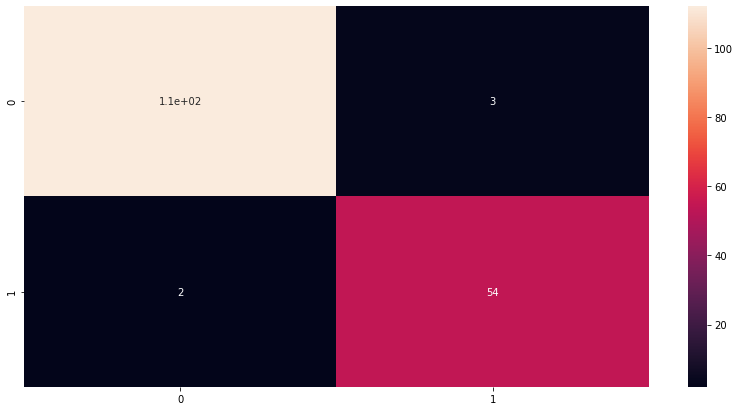

In [19]:
# creating heatmap of confussion matrix
plt.figure(figsize=[14,7])
sb.heatmap(cm,annot=True)
plt.show()

dict_keys(['loss', 'accuracy'])


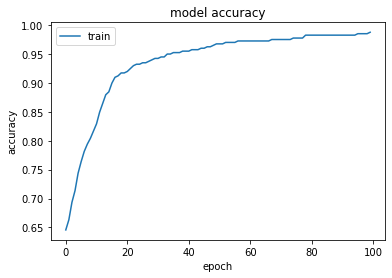

In [20]:
# list all data in history
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

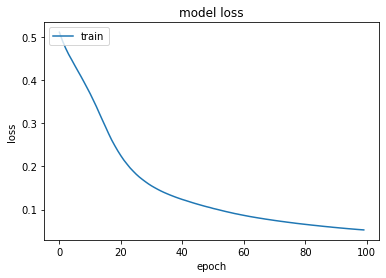

In [21]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

SGD OPTIMISER

In [22]:
#creating model
m1 = Sequential()

#first hidden layer
m1.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))
#second hidden layer
m1.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
m1.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [23]:
m1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9)                 279       
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [25]:
m1.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
model = m1.fit(xtrain,ytrain,batch_size=100,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 0s/step - loss: 1.6245 - accuracy: 0.0955
Epoch 2/100
4/4 [==============================] - 0s 0s/step - loss: 1.3943 - accuracy: 0.1080
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.2233 - accuracy: 0.1533
Epoch 4/100
4/4 [==============================] - 0s 0s/step - loss: 1.0921 - accuracy: 0.1910
Epoch 5/100
4/4 [==============================] - 0s 0s/step - loss: 0.9936 - accuracy: 0.2412
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9181 - accuracy: 0.2789
Epoch 7/100
4/4 [==============================] - 0s 0s/step - loss: 0.8610 - accuracy: 0.3392
Epoch 8/100
4/4 [==============================] - 0s 0s/step - loss: 0.8154 - accuracy: 0.4296
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7780 - accuracy: 0.4774
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7465 - accuracy: 0.5327
Epoch 11/100
4/4 [=================

4/4 [==============================] - 0s 0s/step - loss: 0.1492 - accuracy: 0.9623
Epoch 86/100
4/4 [==============================] - 0s 0s/step - loss: 0.1478 - accuracy: 0.9623
Epoch 87/100
4/4 [==============================] - ETA: 0s - loss: 0.1549 - accuracy: 0.97 - 0s 3ms/step - loss: 0.1463 - accuracy: 0.9623
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9623
Epoch 89/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1435 - accuracy: 0.9623
Epoch 90/100
4/4 [==============================] - 0s 0s/step - loss: 0.1422 - accuracy: 0.9623
Epoch 91/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1409 - accuracy: 0.9623
Epoch 92/100
4/4 [==============================] - 0s 0s/step - loss: 0.1396 - accuracy: 0.9623
Epoch 93/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.9623
Epoch 94/100
4/4 [==============================] - 0s 0s/step - loss: 0.1372 - accuracy: 0.9

In [27]:
y_pred1 = m1.predict(xtest)
y_pred1 = (y_pred1>0.5)

In [28]:
cm = confusion_matrix(ytest,y_pred1)
score = accuracy_score(ytest,y_pred1)
print(cm)
print('score is:',score)

[[111   4]
 [  2  54]]
score is: 0.9649122807017544


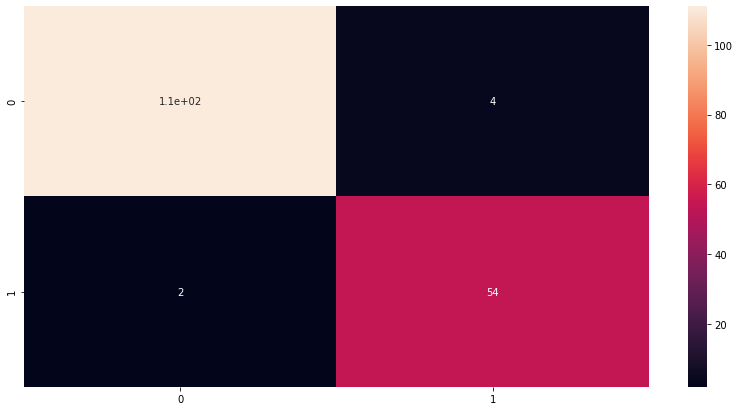

In [29]:
plt.figure(figsize=[14,7])
sb.heatmap(cm,annot=True)
plt.show()

dict_keys(['loss', 'accuracy'])


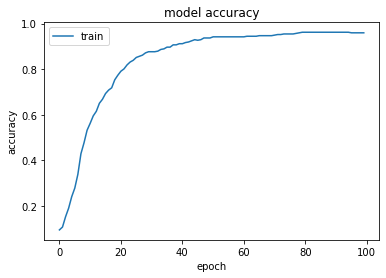

In [30]:
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

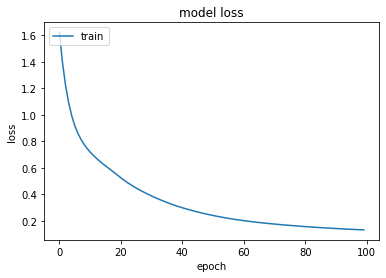

In [31]:
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()